In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from sklearn.decomposition import PCA

matrix = np.array([[-1, 0, 0], [1, 4, 4], [-1, -2, -2]])


def compress_image(image, components):
    pca = PCA(n_components=components)
    image_compressed = pca.fit_transform(image)
    new_image = pca.inverse_transform(image_compressed)
    plt.imshow(new_image, cmap="gray")
    plt.show()


def eigen(matrix):
    (eigenvalues, eigenvectors) = np.linalg.eig(matrix)
    for index in range(len(eigenvectors)):
        matrix_dot = np.dot(matrix, eigenvectors[:, index])
        eigen_dot = np.dot(eigenvalues[index], eigenvectors[:, index])
        if not np.allclose(matrix_dot, eigen_dot):
            print("Error")
            return
    return eigenvalues, eigenvectors


def get_sorted_eigenvalues(matrix):
    mean = np.mean(matrix)
    std = np.std(matrix)
    std_matrix = (matrix - mean) / std
    cov_matrix = np.cov(std_matrix)
    eigenvalues, _ = eigen(cov_matrix)
    index = np.argsort(eigenvalues)[::-1]
    return eigenvalues[index]


def encrypt_message(message, key_matrix):
    message_vector = np.array([ord(char) for char in message])
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(
        np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors)
    )
    encrypted_vector = np.dot(diagonalized_key_matrix, message_vector)
    return encrypted_vector


def decrypt_message(encrypted_vector, key_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(
        np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors)
    )
    decrypted_vector = np.dot(np.linalg.inv(diagonalized_key_matrix), encrypted_vector)
    decrypted_message = "".join([chr(штеnp.round(char)) for char in decrypted_vector])
    return decrypted_message

In [2]:
eigenvalues, eigenvectors = eigen(matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [ 0.  2. -1.]
Eigenvectors: [[ 0.          0.          0.57735027]
 [ 0.70710678 -0.89442719 -0.57735027]
 [-0.70710678  0.4472136   0.57735027]]


(720, 1080, 3)


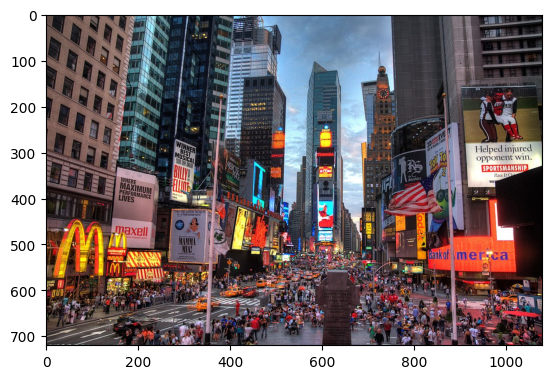

In [3]:
image_raw = imread("image.jpg")
print(image_raw.shape)
plt.imshow(image_raw)
plt.show()

(720, 1080)
1.0


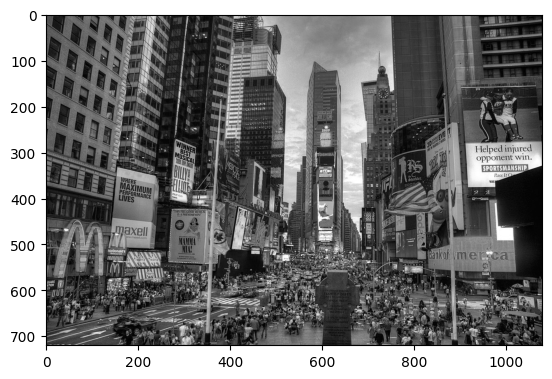

In [4]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)
image_bw = image_sum / image_sum.max()
print(image_bw.max())
plt.imshow(image_bw, cmap="gray")
plt.show()

In [5]:
eigenvalues = get_sorted_eigenvalues(image_bw)
cumulative = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print("Cumulative variance: ", cumulative)

Cumulative variance:  [0.2524662  0.36982582 0.45567346 0.50784984 0.55080914 0.57769654
 0.60130204 0.62183176 0.63929581 0.65568805 0.66915763 0.68132862
 0.69266687 0.70357638 0.71286185 0.72176941 0.72995107 0.7371491
 0.74388357 0.75053092 0.75675216 0.76274795 0.76852999 0.77357211
 0.77858044 0.78342796 0.78787585 0.7922985  0.79655243 0.80065673
 0.80469562 0.80852027 0.81219899 0.8158342  0.81934809 0.82260424
 0.82580403 0.82887541 0.83186611 0.83477476 0.83759207 0.84028416
 0.84290477 0.8454946  0.8479797  0.85036628 0.85270131 0.85500466
 0.85724409 0.85945338 0.86157606 0.86368104 0.86571928 0.8676875
 0.86960987 0.87149394 0.87334467 0.87512457 0.87683162 0.87853484
 0.88017427 0.88179004 0.88335892 0.88490999 0.88641671 0.88790335
 0.8893694  0.89078707 0.89217696 0.89355207 0.894901   0.89623484
 0.89752227 0.89879194 0.90004908 0.90130167 0.90251764 0.90369339
 0.90485196 0.90599197 0.90712156 0.90821321 0.90928582 0.91033983
 0.91136868 0.91238789 0.91340135 0.914405

In [6]:
components = np.argmax(cumulative > 0.95) + 1
print("Components(95%): ", components)

Components(95%):  139


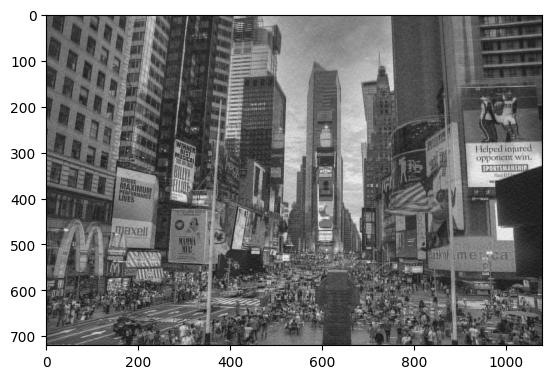

In [7]:
compress_image(image_bw, components)

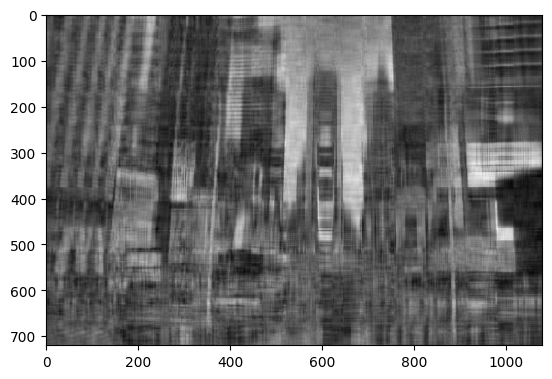

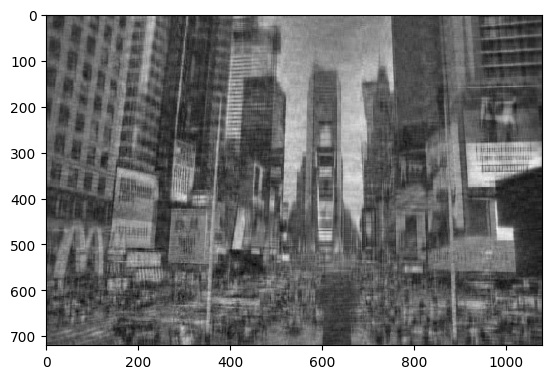

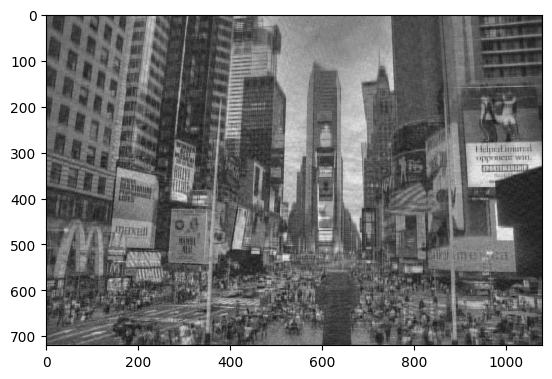

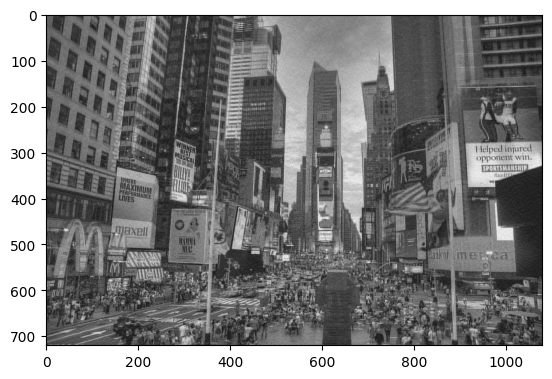

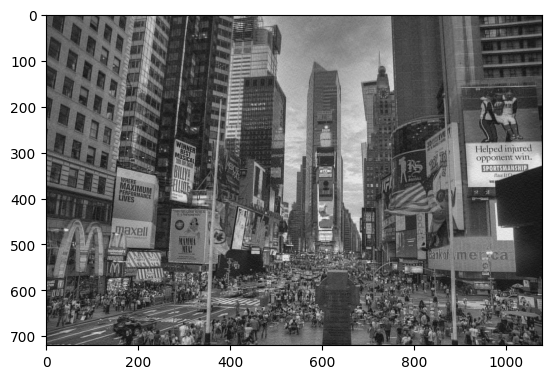

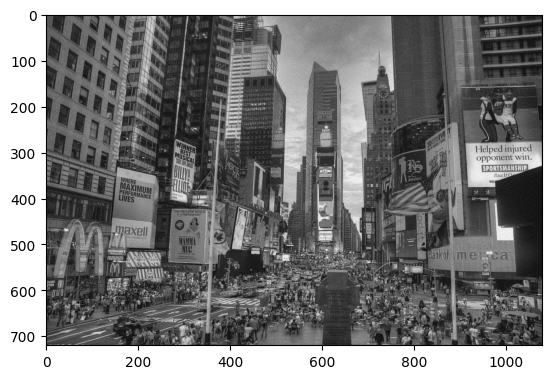

In [8]:
compress_image(image_bw, 15)
compress_image(image_bw, 35)
compress_image(image_bw, 75)
compress_image(image_bw, 150)
compress_image(image_bw, 200)
compress_image(image_bw, 250)

In [9]:
message = "Hello, World!"
key_matrix = np.random.randint(0, 256, (len(message), len(message)))
encrypted_message = encrypt_message(message, key_matrix)
print("Encrypted message:", encrypted_message)

Encrypted message: [160825.-3.34923558e-11j 112510.-2.47794038e-11j 145008.-1.96790131e-11j
 156382.-3.00352986e-11j 114298.-1.93622125e-11j 138240.-2.19567818e-11j
 117298.-2.64521579e-11j 164945.-1.80385947e-11j 151877.-2.74095476e-11j
 167215.-2.77296562e-11j 138050.-3.26945818e-11j 167944.-4.63257710e-11j
  95749.-2.42050637e-11j]


In [10]:
decrypted_message = decrypt_message(encrypted_message, key_matrix)
print("Decrypted message:", decrypted_message)

Decrypted message: Hello, World!


C:\Users\ostep\AppData\Local\Temp\ipykernel_10704\1225561756.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  decrypted_message = "".join([chr(np.round(char)) for char in decrypted_vector])
C:\Users\ostep\AppData\Local\Temp\ipykernel_10704\1225561756.py:54: DeprecationWarning: an integer is required (got type numpy.complex128).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  decrypted_message = "".join([chr(np.round(char)) for char in decrypted_vector])
